In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus # used to visualise the tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("HandsonExerciseDataSet.xlsx")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.age.unique()

array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [4]:
data.loc[data[(data['age'] >17) & (data['age'] <= 30)].index,'age'] = 1
data.loc[data[(data['age'] >30) & (data['age'] <= 40)].index,'age'] = 2
data.loc[data[(data['age'] >40) & (data['age'] <= 50)].index,'age'] = 3
data.loc[data[(data['age'] >50)].index,'age'] = 4


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,1,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,1,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,2,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,3,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

## 0 - Unknown

## 1 - Not Earning

## 2 - Earning

In [6]:
data.loc[data[data['job'] == 'unknown'].index,['job']] = 0

In [7]:
data.loc[data[data['job'] == 'student'].index,['job']] = 1
data.loc[data[data['job'] == 'retired'].index,['job']] = 1
data.loc[data[data['job'] == 'housemaid'].index,['job']] = 1
data.loc[data[data['job'] == 'unemployed'].index,['job']] = 1

In [8]:
data.loc[data[data['job'] == 'blue-collar'].index,['job']] = 2
data.loc[data[data['job'] == 'services'].index,['job']] = 2
data.loc[data[data['job'] == 'admin.'].index,['job']] = 2
data.loc[data[data['job'] == 'entrepreneur'].index,['job']] = 2
data.loc[data[data['job'] == 'technician'].index,['job']] = 2
data.loc[data[data['job'] == 'management'].index,['job']] = 2
data.loc[data[data['job'] == 'self-employed'].index,['job']] = 2
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,1,2,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,2,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,1,2,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,2,2,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,3,2,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [9]:
data.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

## 0 - Unknown

## 1 - Basic

## 2 - High School

## 3 - university.degree

## 4 - professional.course

## 5 - Illiterate

In [10]:
data.loc[data[data['education'] == 'unknown'].index,['education']] = 0
data.loc[data[data['education'] == 'basic.9y'].index,['education']] = 1
data.loc[data[data['education'] == 'basic.6y'].index,['education']] = 1
data.loc[data[data['education'] == 'basic.4y'].index,['education']] = 1
data.loc[data[data['education'] == 'high.school'].index,['education']] = 2
data.loc[data[data['education'] == 'university.degree'].index,['education']] = 3
data.loc[data[data['education'] == 'professional.course'].index,['education']] = 4
data.loc[data[data['education'] == 'illiterate'].index,['education']] = 5

In [11]:
data.job.unique()

array([2, 1, 0], dtype=int64)

In [12]:
data.job = data.job.astype('int64')
data.job = data.education.astype('int64')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,1,1,married,1,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,2,single,2,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,1,2,married,2,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,2,1,married,1,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,3,3,married,3,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


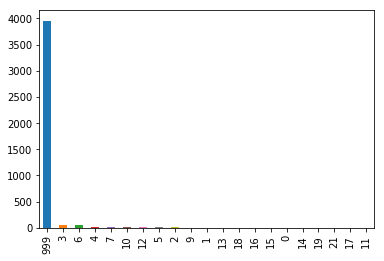

In [13]:
data.pdays.value_counts().plot.bar()

# pdays - Number of days since the client was last contacted in a previous campaign. 999 means client was not previously contacted

## 0 - Not Contacted

## 1 - Contacted``

In [14]:
data.loc[data[data.pdays < 999].index,'pdays'] = 1
data.loc[data[data.pdays == 999].index,'pdays'] = 0
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,1,1,married,1,no,yes,no,cellular,may,fri,2,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,2,single,2,no,no,no,telephone,may,fri,4,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,1,2,married,2,no,yes,no,telephone,jun,wed,1,0,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,2,1,married,1,no,unknown,unknown,telephone,jun,fri,3,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,3,3,married,3,no,yes,no,cellular,nov,mon,1,0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Previous - Number of contacts performed before this campaign for this client

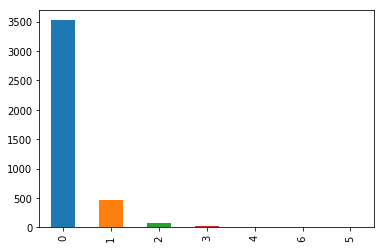

In [15]:
data.previous.value_counts().plot.bar()

client that were contacted in a previous campaign and Number of contacts performed before this campaign.

All the clients that were contacted previously have been contacted during this campaign too.

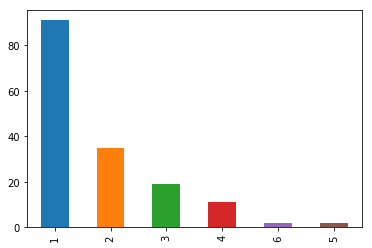

In [16]:
data[data.pdays == 1][['pdays','previous']]['previous'].value_counts().plot.bar()

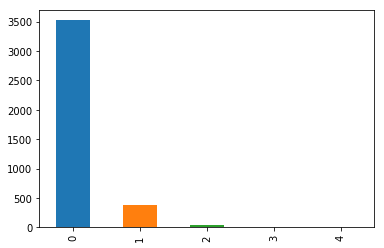

In [17]:
data[data.pdays == 0][['pdays','previous']]['previous'].value_counts().plot.bar()

## Campaign - Number of contacts performed during this campaign for this client (including last contact)

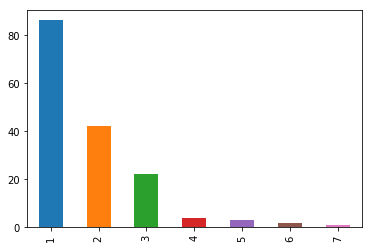

In [18]:
data[data.pdays == 1][['pdays','campaign']]['campaign'].value_counts().plot.bar()

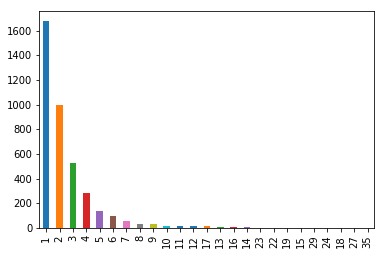

In [19]:
data[data.pdays == 0][['pdays','campaign']]['campaign'].value_counts().plot.bar()

All the clients have been contacted atleast once during this campaign

In [20]:
data = pd.get_dummies(data, columns = ['marital','housing','contact','month','day_of_week','poutcome'],drop_first=True)
data.head()

,age,job,education,default,loan,campaign,pdays,previous,empvarrate,conspriceidx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,1,1,no,no,2,0,0,-1.8,92.893,...,1,0,0,0,0,0,0,0,1,0
1,2,2,2,no,no,4,0,0,1.1,93.994,...,1,0,0,0,0,0,0,0,1,0
2,1,2,2,no,no,1,0,0,1.4,94.465,...,0,0,0,0,0,0,0,1,1,0
3,2,1,1,no,unknown,3,0,0,1.4,94.465,...,0,0,0,0,0,0,0,0,1,0
4,3,3,3,no,no,1,0,0,-0.1,93.200,...,0,1,0,0,1,0,0,0,1,0


In [21]:
data.shape

(4119, 35)

In [22]:
data.columns

Index(['age', 'job', 'education', 'default', 'loan', 'campaign', 'pdays',
       'previous', 'empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m',
       'nremployed', 'y', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_unknown', 'housing_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [23]:
data.loc[data[data['y']=='yes'].index,'y'] = 1
data.loc[data[data['y']=='no'].index,'y'] = 0

In [33]:
data.loc[data[data['default']=='yes'].index,'y']

3514    1
Name: y, dtype: int64

In [24]:
data.loc[data[data['default']=='yes'].index,'default'] = 2
data.loc[data[data['default']=='no'].index,'default'] = 1
data.loc[data[data['default']=='unknown'].index,'default'] = 0

In [25]:
data.loc[data[data['loan']=='yes'].index,'loan'] = 2
data.loc[data[data['loan']=='no'].index,'loan'] = 1
data.loc[data[data['loan']=='unknown'].index,'loan'] = 0

In [26]:
data.head()

,age,job,education,default,loan,campaign,pdays,previous,empvarrate,conspriceidx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,1,1,1,1,2,0,0,-1.8,92.893,...,1,0,0,0,0,0,0,0,1,0
1,2,2,2,1,1,4,0,0,1.1,93.994,...,1,0,0,0,0,0,0,0,1,0
2,1,2,2,1,1,1,0,0,1.4,94.465,...,0,0,0,0,0,0,0,1,1,0
3,2,1,1,1,0,3,0,0,1.4,94.465,...,0,0,0,0,0,0,0,0,1,0
4,3,3,3,1,1,1,0,0,-0.1,93.200,...,0,1,0,0,1,0,0,0,1,0


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
A = StandardScaler()

In [29]:
data_std = A.fit_transform(data.drop('y',axis=1))
data_std = pd.DataFrame(data_std)

In [30]:
data_std.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.464039,-1.060155,-1.060155,0.490957,-0.331249,-0.209228,-0.201033,-0.351356,-1.206054,-1.185448,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
1,-0.444533,-0.167336,-0.167336,0.490957,-0.331249,0.569634,-0.201033,-0.351356,0.649441,0.715193,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
2,-1.464039,-0.167336,-0.167336,0.490957,-0.331249,-0.598660,-0.201033,-0.351356,0.841389,1.528273,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,0.411308,-0.188958
3,-0.444533,-1.060155,-1.060155,0.490957,-2.767704,0.180203,-0.201033,-0.351356,0.841389,1.528273,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
4,0.574973,0.725484,0.725484,0.490957,-0.331249,-0.598660,-0.201033,-0.351356,-0.118350,-0.655478,...,-0.709039,2.869743,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,0.411308,-0.188958


In [31]:
cols = data.columns.tolist()
cols.remove('y')
data_std.columns = cols
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_std[cols],data['y'], test_size = 0.22, random_state = 1)

In [32]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [33]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_test.value_counts()

0    820
1     87
Name: y, dtype: int64

In [35]:
preds = tree.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
print(confusion_matrix(y_test,preds))
print(cohen_kappa_score(y_test,preds))
print(accuracy_score(y_test,preds))

[[807  13]
 [ 68  19]]
0.2823035217115225
0.9106945975744212


In [37]:
data_std.head()

,age,job,education,default,loan,campaign,pdays,previous,empvarrate,conspriceidx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-1.464039,-1.060155,-1.060155,0.490957,-0.331249,-0.209228,-0.201033,-0.351356,-1.206054,-1.185448,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
1,-0.444533,-0.167336,-0.167336,0.490957,-0.331249,0.569634,-0.201033,-0.351356,0.649441,0.715193,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
2,-1.464039,-0.167336,-0.167336,0.490957,-0.331249,-0.598660,-0.201033,-0.351356,0.841389,1.528273,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,0.411308,-0.188958
3,-0.444533,-1.060155,-1.060155,0.490957,-2.767704,0.180203,-0.201033,-0.351356,0.841389,1.528273,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
4,0.574973,0.725484,0.725484,0.490957,-0.331249,-0.598660,-0.201033,-0.351356,-0.118350,-0.655478,...,-0.709039,2.869743,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,0.411308,-0.188958


In [38]:
pred_prob = tree.predict_proba(X_test)
thresholds = np.linspace(0.0,0.99,num=20)
cm = confusion_matrix(y_true=y_test, y_pred=preds)
cm

array([[0.60456274, 0.39543726],
       [0.94828397, 0.05171603],
       [0.30434783, 0.69565217],
       ...,
       [0.9024024 , 0.0975976 ],
       [0.94828397, 0.05171603],
       [0.94828397, 0.05171603]])

array([[807,  13],
       [ 68,  19]], dtype=int64)

In [41]:
def ROC(actual,predicted,pred_prob,threshold_vals):
    from sklearn.metrics import auc, roc_curve, confusion_matrix
    tpr = []
    fpr = []
    for th in threshold_vals:
        y_cap = np.where(pred_prob[:,0]<th, 1,0)
        cm = confusion_matrix(y_true=actual, y_pred=y_cap)
        #print(cm)
        tpr.append(cm[1,1]/sum(cm[1,:]))
        fpr.append(cm[0,1]/sum(cm[0,:]))
    plt.plot(fpr, tpr)
    plt.plot([0,1])
    a = auc(fpr,tpr)
    plt.title(a)
    tn, fp, fn, tp = confusion_matrix(y_true=actual, y_pred=predicted).ravel()
    print("TN = ",tn)
    print("FP = ",fp)
    print("FN = ",fn)
    print("TP = ",tp)

TN =  807
FP =  13
FN =  68
TP =  19


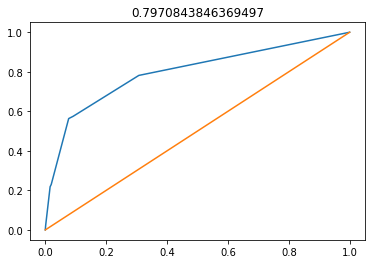

In [42]:
ROC(y_test,preds,pred_prob,thresholds)

In [45]:
from sklearn.metrics import make_scorer 
# Create a scoring function and it will be maximized and the CV will run in such a way that the score is max

def K(y,y_pred,**kargs):
    try:
        return cohen_kappa_score(y,y_pred)
    except:
        from sklearn.metrics import make_scorer
        return cohen_kappa_score(y,y_pred)
    
Kappa = make_scorer(K)

In [46]:
from sklearn import model_selection 
kfold1 = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(tree, data_std[cols],data['y'], cv= kfold1,scoring=Kappa)
results.mean()

0.28185595218973647

## SVM

In [124]:
from sklearn import svm
model = svm.SVC(kernel='poly', C=0.001, gamma=0.1,probability=True)

In [125]:
model.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
model.score(X_train, y_train)
predicted= model.predict(X_test)

In [127]:
pred_prob1 = model.predict_proba(X_test)

TN =  805
FP =  15
FN =  68
TP =  19


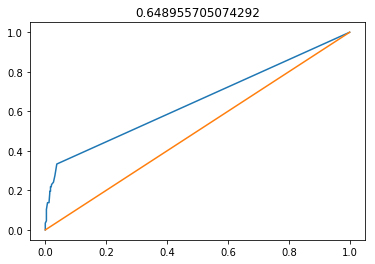

In [128]:
ROC(y_test,predicted,pred_prob1,thresholds)

In [130]:
from sklearn import model_selection 
kfold1 = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(model, data_std[cols],data['y'], cv= kfold1,scoring=Kappa)
results.mean()

0.2686377180108171

In [131]:
from sklearn.model_selection import GridSearchCV
Cs = [0.0001,0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}n
grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=5,n_jobs=4)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 0.001, 'gamma': 0.1}